### Option Volume to SPY comparision

In this note it tries to see if there is a correlitation between daily options volume to the movement in SPY. It fetches the daily data for a

In [1]:
import numpy as py
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import urllib.request as request
import json
from datetime import datetime
import time
from matplotlib.dates import DayLocator
import seaborn as sns

##### Plot styles

In [2]:
sns.set_theme(palette="pastel")

##### The timeframe for the analysis

In [3]:
startDate = "2022-08-01"
endDate = "2022-08-31"

##### Fetch SPY data.

In [4]:
spy = yf.download("SPY", start=startDate, end=endDate)
spy

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,409.149994,413.410004,408.399994,410.769989,410.769989,69997500
2022-08-02,409.119995,413.000000,406.820007,408.059998,408.059998,63435400
2022-08-03,410.299988,415.679993,410.000000,414.450012,414.450012,67820600
2022-08-04,414.369995,415.089996,412.440002,414.170013,414.170013,45656600
2022-08-05,409.660004,414.149994,409.600006,413.470001,413.470001,56814900
2022-08-08,415.250000,417.619995,411.829987,412.989990,412.989990,53886100
2022-08-09,412.220001,412.750000,410.220001,411.350006,411.350006,44931800
2022-08-10,418.779999,420.140015,416.720001,419.989990,419.989990,68665700
2022-08-11,422.989990,424.950012,419.209991,419.989990,419.989990,59489700


##### Fetches the daily options volue for OCC website for the selected month.

In [5]:
# This function gets the OptionsDailyVolume and returns a formated data.
def fetch_daily_volume(date):
    
    try:
        url = f'https://marketdata.theocc.com/mdapi/daily-volume-totals?report_date={date.strftime("%Y-%m-%d")}'
        response = request.urlopen(url)
        data = json.loads(response.read())
    except:
        print("Error")
    
    return {
        "Date": date,
        "OCCTotal": data["entity"]["total_volume"][-1]["volume"],
        "P/C Ratio": data["entity"]["total_volume"][-1]["ratio"],
        "IndexTotalVolume": data["entity"]["index_volume"][-1]["volume"],
        "Index P/C Ratio": data["entity"]["index_volume"][-1]["ratio"],
        "EquityTotalVolume": data["entity"]["equity_volume"][-1]["volume"],
        "Equity P/C Ratio": data["entity"]["equity_volume"][-1]["ratio"],
    }

In [8]:
daily_volume_data = []

for date in spy.index:
    daily_volume_data.append(fetch_daily_volume(date))
    time.sleep(10)


daily_options_volume = pd.DataFrame(daily_volume_data)
daily_options_volume.set_index("Date", inplace=True)

daily_options_volume

,OCCTotal,P/C Ratio,IndexTotalVolume,Index P/C Ratio,EquityTotalVolume,Equity P/C Ratio
Date,,,,,,
2022-08-01,37312570,0.87,2561309,1.26,34751261,0.85
2022-08-02,35998638,0.83,2673813,1.26,33324825,0.80
2022-08-03,42859054,0.79,2553415,1.09,40305639,0.78
2022-08-04,37702022,0.74,2120266,1.20,35581756,0.72
2022-08-05,45096441,0.80,2899934,1.04,42196507,0.79
2022-08-08,40889404,0.77,2648074,1.33,38241330,0.74
2022-08-09,33355728,0.86,2031522,1.16,31324206,0.85
2022-08-10,43587791,0.86,3117368,1.21,40470423,0.83
2022-08-11,45819319,0.72,2931443,1.21,42887876,0.69


##### Plot both options and spy together for analysis

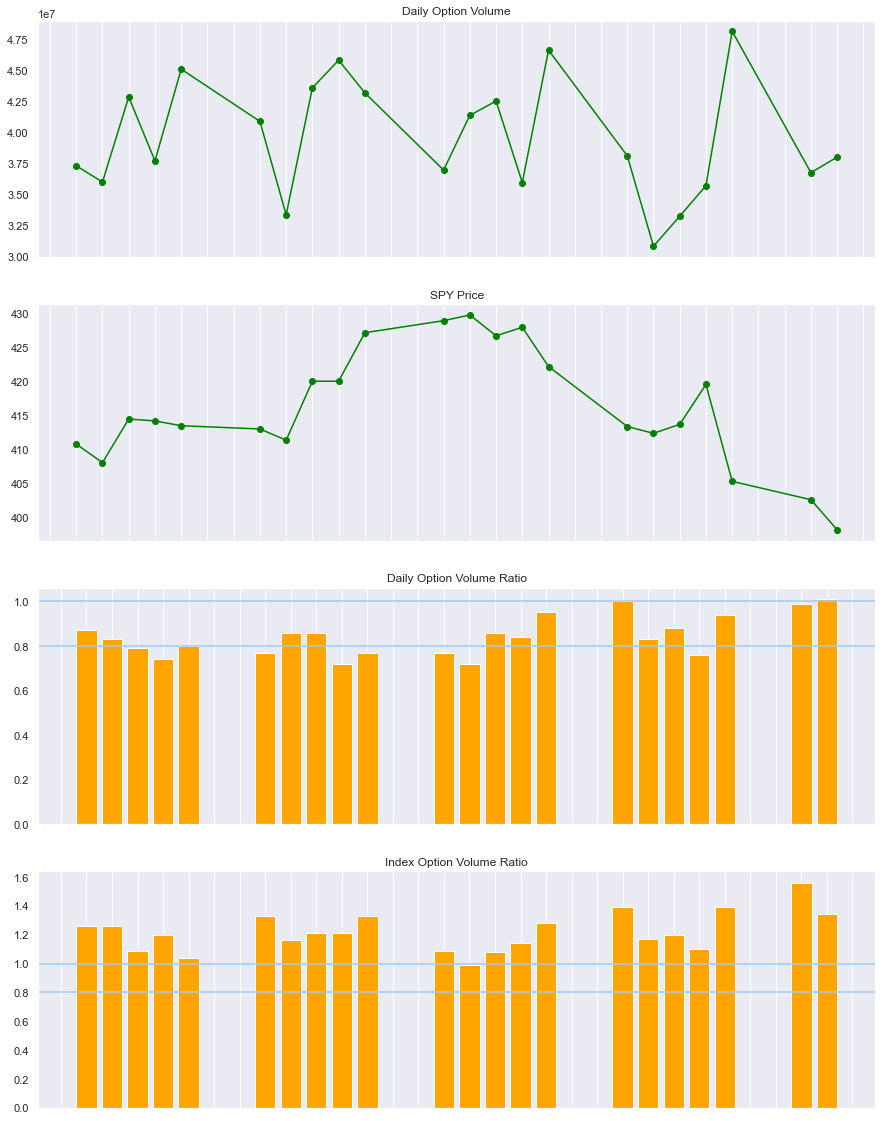

In [9]:
figure, axis = plt.subplots(4, 1, figsize=(15, 20))


dloc = DayLocator()

# Option daily volume plot
oax = axis[0]
oax.set_title("Daily Option Volume")
oax.plot(daily_options_volume.index, daily_options_volume["OCCTotal"], marker = 'o', color='green')
oax.xaxis.set_major_locator(dloc)
oax.grid(which='major', axis='y')
oax.set_xticklabels("")


# SPY plot
sax = axis[1]
sax.set_title("SPY Price")
sax.plot(spy.index, spy["Close"], marker = 'o', color='green')
sax.xaxis.set_major_locator(dloc)
sax.grid(which='major', axis='y')
sax.set_xticklabels("")

# Option daily volume ratio plot
rax = axis[2]
rax.set_title("Daily Option Volume Ratio")
rax.bar(daily_options_volume.index, daily_options_volume["P/C Ratio"], color='orange')
rax.xaxis.set_major_locator(dloc)
rax.grid(which='major', axis='y')
rax.set_xticklabels("")
rax.axhline(y=1)
rax.axhline(y=0.8)

# Index option volume ratio plot
iax = axis[3]
iax.set_title("Index Option Volume Ratio")
iax.bar(daily_options_volume.index, daily_options_volume["Index P/C Ratio"], color='orange')
iax.xaxis.set_major_locator(dloc)
iax.grid(which='major', axis='y')
iax.set_xticklabels("")
iax.axhline(y=1)
iax.axhline(y=0.8)

plt.show()